<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [7]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Add any additional libraries you might require


## Data preparation

In [8]:
# YOUR CODE HERE (OPTION) 
# Load the dataset
cleaned_df = pd.read_csv("../data/processed/21127104_asia_processed.csv")

# Handle missing values if any
cleaned_df.dropna(inplace=True)

# Encode categorical variables if present using pd.get_dummies() or sklearn's OneHotEncoder

# Example for splitting the dataset into features and target for regression
# Let's say we want to predict 'Male life expectancy' using other features
X = cleaned_df.drop(['Male life expectancy', 'Country', 'Year'], axis=1)
y = cleaned_df['Male life expectancy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature engineering

In [9]:
# YOUR CODE HERE (OPTION) 
# Scale the features if required
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training model

In [15]:
# YOUR CODE HERE (OPTION) 
cleaned_df['Life Expectancy Class'] = ['High' if x > cleaned_df['Male life expectancy'].median() else 'Low' for x in cleaned_df['Male life expectancy']]

# Prepare the classification target
y_class = cleaned_df['Life Expectancy Class']

# Split the data into training and test sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Initialize the classification model
classifier = RandomForestClassifier()

# Train the classification model
classifier.fit(X_train_class, y_train_class)


RandomForestClassifier()

## Evaluation

In [16]:
# YOUR CODE HERE (OPTION) 
# Make predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))


Accuracy: 0.9924242424242424
              precision    recall  f1-score   support

        High       1.00      0.99      0.99       136
         Low       0.98      1.00      0.99       128

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264

[[134   2]
 [  0 128]]


## Prediction

In [12]:
# YOUR CODE HERE (OPTION) 
# Initialize the regression model
regressor = RandomForestRegressor(random_state=42)

# Train the regression model
regressor.fit(X_train_scaled, y_train)

# Make predictions with the trained regressor
y_pred_reg = regressor.predict(X_test_scaled)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(y_test, y_pred_reg)
print(f'Regression Mean Squared Error: {mse}')


Regression Mean Squared Error: 0.4444828029967399


## Results analysis

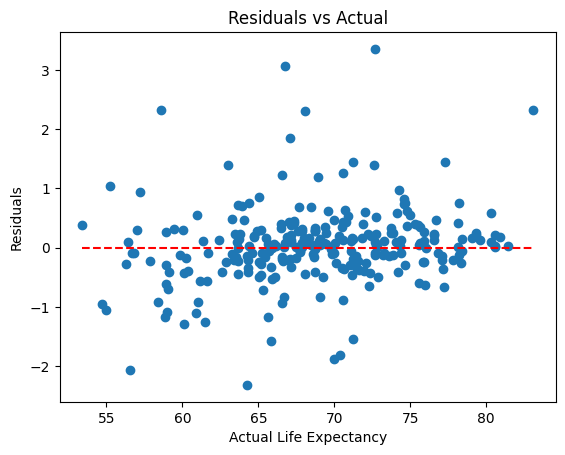

In [13]:
# YOUR CODE HERE (OPTION) 
# Calculate residuals
residuals = y_test - y_pred_reg

# Plot the residuals
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', linestyle='--')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()

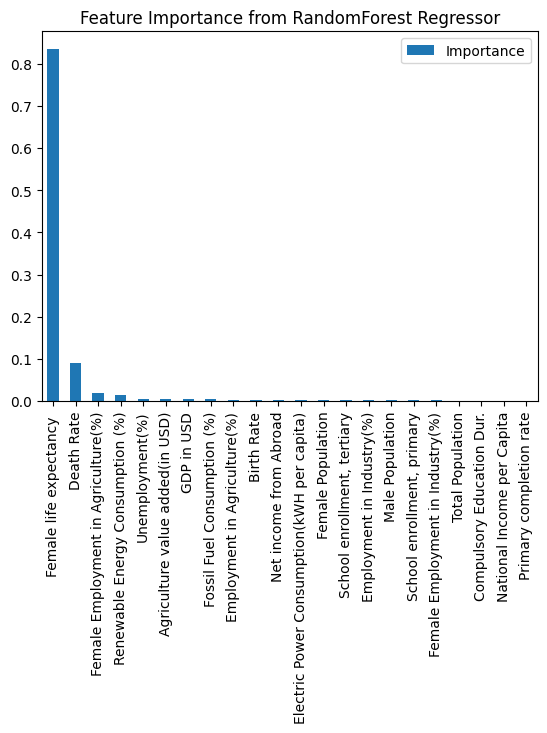

In [17]:
# Get feature importances from the regressor
importances = regressor.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importance from RandomForest Regressor')
plt.show()


## Conclusion

**Your conclusion**

- The RandomForest Regressor has determined that `Female life expectancy` is by far the most significant predictor of `Male life expectancy`, assuming that's the target variable being predicted, which suggests that gender life expectancies are strongly correlated.
- The residual plot indicates that the regression model performs relatively well across the range of life expectancy values, with no clear pattern in the residuals, although there may be some potential outliers or variance in prediction accuracy at certain points.